In [1]:
import requests as req
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
now = int(datetime.datetime.now().timestamp())

month_ago = int(datetime.datetime.now().timestamp()) - 2592000

def hit_api_one_month(coin):
    return req.get('https://api.coingecko.com/api/v3/coins/' + coin + '/market_chart/range?vs_currency=usd&from=' + str(month_ago) + '&to=' + str(now))

In [3]:
dot = hit_api_one_month('polkadot')


In [4]:
def convert_json(resp):
    return json.loads(resp.text)

In [5]:
pdot = convert_json(dot)

In [6]:
def add_dt(json):
    data = []

    for i in json['prices']:

        temp = [datetime.datetime.fromtimestamp(int(i[0]/1000)), i[1]]

        data.append(temp)

    return data

In [7]:
podot = add_dt(pdot)

In [8]:
def make_df(data):
    total_df = pd.DataFrame(data, columns=['date', 'price'])

    total_df['MA24'] = total_df['price'].rolling(24).mean()

    total_df = total_df.set_index('date')

    return total_df

In [9]:
dot_df = make_df(podot)

In [10]:
dot_df

,price,MA24
date,,
2021-07-02 11:01:07,15.125115,NaN
2021-07-02 12:01:08,15.094817,NaN
2021-07-02 13:02:10,15.081604,NaN
2021-07-02 14:01:25,14.956270,NaN
2021-07-02 15:00:07,15.203914,NaN
...,...,...
2021-08-01 06:01:59,18.257456,17.593566
2021-08-01 07:00:57,18.104162,17.666849
2021-08-01 08:00:28,18.735222,17.771496


In [11]:
dot_low = dot_df.price.min()
dot_high = dot_df.price.max()
dot_diff = dot_high - dot_low
dot_fib1 = dot_high - 0.236 * dot_diff
dot_fib2 = dot_high - 0.382 * dot_diff
dot_fib3 = dot_high - 0.618 * dot_diff

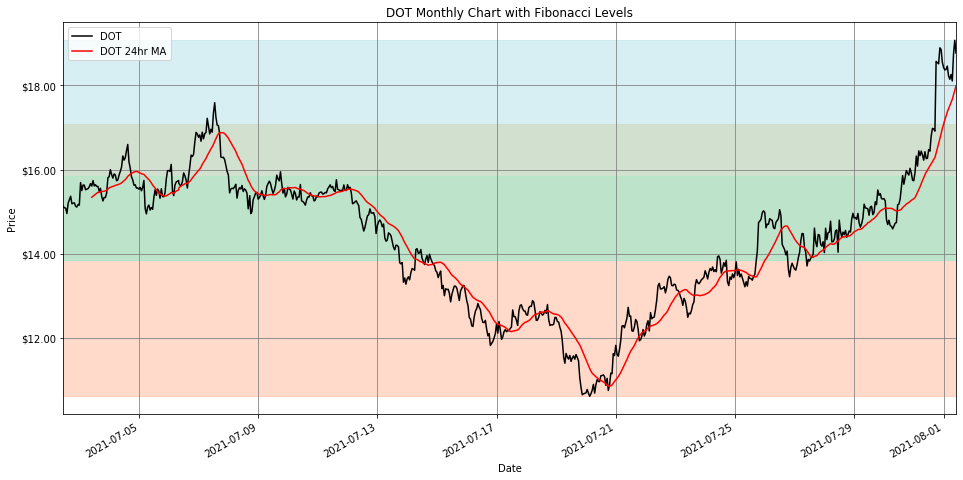

In [12]:
fig, ax = plt.subplots()

ax.axhspan(dot_fib1, dot_low, alpha=0.4, color='lightsalmon')
ax.axhspan(dot_fib2, dot_fib1, alpha=0.5, color='palegoldenrod')
ax.axhspan(dot_fib3, dot_fib2, alpha=0.5, color='palegreen')
ax.axhspan(dot_high, dot_fib3, alpha=0.5, color='powderblue')

dot_df['price'].plot(label='DOT', figsize=[16,8], title = 'DOT Monthly Chart with Fibonacci Levels', color='black')
dot_df['MA24'].plot(label='DOT 24hr MA', color='red')

plt.ylabel("Price")
plt.xlabel("Date")
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.grid(True, color='gray')
plt.legend(loc=2)
plt.show()
#plt.savefig('DOTMonthlyFibLevels.png')